<a href="https://colab.research.google.com/github/fershik/EAN_Guias_ProgramacionCD/blob/main/Guia%203/Gu%C3%ADa3_Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3 - ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

### Integrantes: John Alexander Castañeda Gordillo - Deisy Fernanda Camacho Vargas


## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

In [1]:
#Importar liberia pandas
import pandas as pd

In [2]:
#Cargar dataset
df=pd.read_csv('accidents-1.csv', sep=';')

#Mostrar las primeras 5 filas del DataFrame
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [3]:
#Se Verifica cuántas filas y columnas tiene el dataset.
df.shape

(238522, 24)

In [4]:
#Se Muestra información general del dataset, incluyendo los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [5]:
#Paso 1:
#Se verifica cuantos valores nulos hay en cada columna
print(" Valores nulos en cada columna:")
print(df.isnull().sum())

 Valores nulos en cada columna:
DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: i

In [6]:
# Paso 2: Imputación de valores faltantes
# Imputacion de valores faltantes columna 'ZIP CODE'
# Agrupar por 'BOROUGH' y calcular la moda de 'ZIP CODE' para cada grupo
#Aqui visualizo el valor de la moda en cada grupo de BOROUGH
modas_zip = df.groupby('BOROUGH')['ZIP CODE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(modas_zip)

BOROUGH
BRONX            10467.0
BROOKLYN         11207.0
MANHATTAN        10019.0
QUEENS           11385.0
STATEN ISLAND    10306.0
Name: ZIP CODE, dtype: float64


In [7]:
# Imputar ZIP CODE con la moda dentro de cada BOROUGH
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0]))
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [8]:
#Verifico si despues de ejecutar la linea anterior quedaron valores nulos
print(f"Cantidad de valores nulos en la columna ZIP CODE: {df['ZIP CODE'].isnull().sum()}")  # Cantidad de valores NaN en ZIP CODE


Cantidad de valores nulos en la columna ZIP CODE: 0


In [9]:
#Imputar valores nulos en LATITUDE y LONGITUDE
#Se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [10]:
#Verifico si despues de ejecutar la linea anterior quedaron valores nulos
print(f"Cantidad de valores nulos en la columna LATITUD: {df['LATITUDE'].isnull().sum()}")  # Cantidad de valores NaN en LATITUD
print(f"Cantidad de valores nulos en la columna LONGITUD: {df['LONGITUDE'].isnull().sum()}")  # Cantidad de valores NaN en LONGITUD

Cantidad de valores nulos en la columna LATITUD: 0
Cantidad de valores nulos en la columna LONGITUD: 0


In [11]:
# Rellenar ON STREET NAME con "UNKNOWN"
df['ON STREET NAME'] = df['ON STREET NAME'].fillna("UNKNOWN")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [12]:
#Verifico si despues de ejecutar la linea anterior quedaron valores nulos
print(f"Cantidad de valores nulos en la columna ON STREET NAME: {df['ON STREET NAME'].isnull().sum()}")  # Cantidad de valores NaN en ON STREET NAME

Cantidad de valores nulos en la columna ON STREET NAME: 0


In [15]:
# Imputar CONTRIBUTING FACTOR VEHICLE X con "Unspecified"
#Identificar las columnas que contienen "CONTRIBUTING FACTOR VEHICLE" y las asigno a una lista
lista_cfv = [col for col in df.columns if "CONTRIBUTING FACTOR VEHICLE" in col]
print(lista_cfv)

['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']


In [18]:
#Rellenar los valores NaN con "Unspecified" en todas las columnas CONTRIBUTING FACTOR VEHICLE X
df[lista_cfv] = df[lista_cfv].fillna("Unspecified")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,NaN,NaN,NaN


In [19]:
#Verifico si despues de ejecutar la linea anterior quedaron valores nulos
print(df[lista_cfv].isnull().sum())

CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
dtype: int64


In [20]:
#Imputar En las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown"
#Identificar las columnas que contienen "VEHICLE TYPE CODE" y las asigno a una lista
vehicle_types = [col for col in df.columns if "VEHICLE TYPE CODE" in col]
print(vehicle_types)

['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


In [21]:
#Rellenar los valores NaN con "Unknown" en todas las columnas VEHICLE TYPE CODE X
df[vehicle_types] = df[vehicle_types].fillna("Unknown")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown


In [22]:
#Verifico si despues de ejecutar la linea anterior quedaron valores nulos
print(df[vehicle_types].isnull().sum())

VEHICLE TYPE CODE 1    0
VEHICLE TYPE CODE 2    0
VEHICLE TYPE CODE 3    0
VEHICLE TYPE CODE 4    0
VEHICLE TYPE CODE 5    0
dtype: int64


In [23]:
#Se verifica cuantos valores nulos quedaron despues de ejecutar todas las imputaciones
print(" Valores nulos en cada columna:")
print(df.isnull().sum())

 Valores nulos en cada columna:
DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [x] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [x] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [x] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [x] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


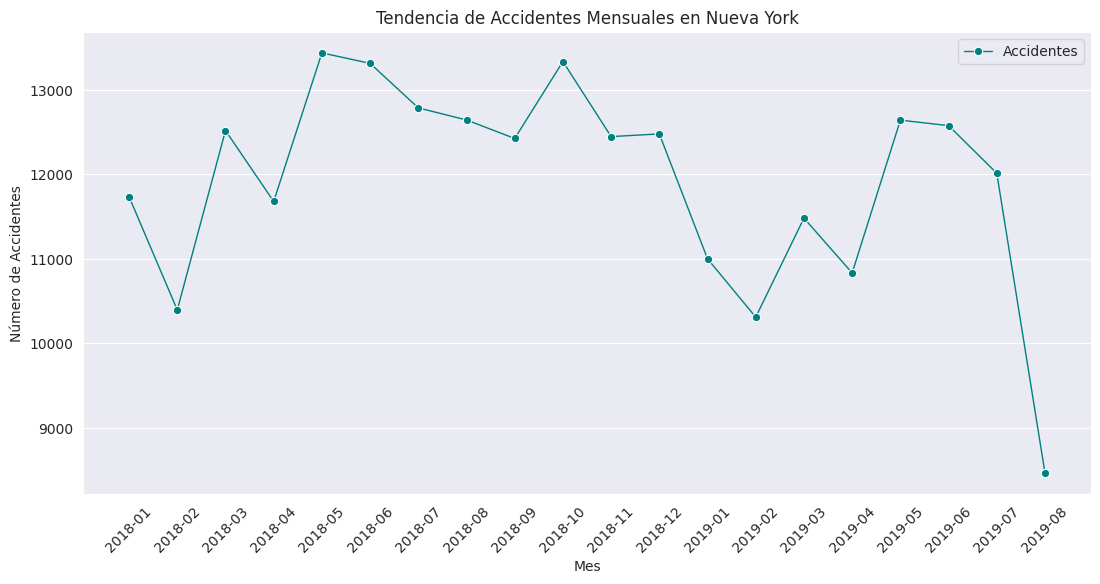

In [25]:
# Solución propuesta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convertir la columna 'DATE' a formato datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extraer el año y mes
df['Año_Mes'] = df['DATE'].dt.to_period('M')

# Contar la cantidad de accidentes por mes
accidentes_mensuales = df.groupby('Año_Mes').size().reset_index(name='Numero_Accidentes')

# Convertir 'Año_Mes' a string para graficar correctamente
accidentes_mensuales['Año_Mes'] = accidentes_mensuales['Año_Mes'].astype(str)

# Configurar estilo de Seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(13,6))

# Crear el gráfico de líneas con Seaborn
sns.lineplot(data=accidentes_mensuales, x='Año_Mes', y='Numero_Accidentes', marker='o', linewidth=1, color="teal", label="Accidentes")

# Personalizar etiquetas y título
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.title('Tendencia de Accidentes Mensuales en Nueva York')
plt.legend()

# Agregar grid solo en las líneas horizontales
plt.grid(axis='x', linestyle='')
plt.show()


***¿Ha aumentado el número de accidentes durante el último año y medio?***

A lo largo de los meses se observa una leve tendencia a la baja, en el ultimo mes se ve mas pronunciada la disminución del número de accidentes.

***De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?***

Los meses que se ven una disminución en accidentes son los meses de febrero de 2018 y 2019. El otro mes que se ve una disminución considerable es el mes de Agosto del 2019.

La coincidencia de los meses de febrero de ambos años se podria dar porque esos meses son epoca de invierno y hay menos tráfico por las condiciones climáticas, por consecuencia a esto puede disminuir la velocidad promedio en la ciudad.

La disminución del mes de Agosto puede estar relacionada con la epoca vacacional por lo que puede provocar que haya menos gente en la ciudad y por ende hay menos tráfico vehicular.

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

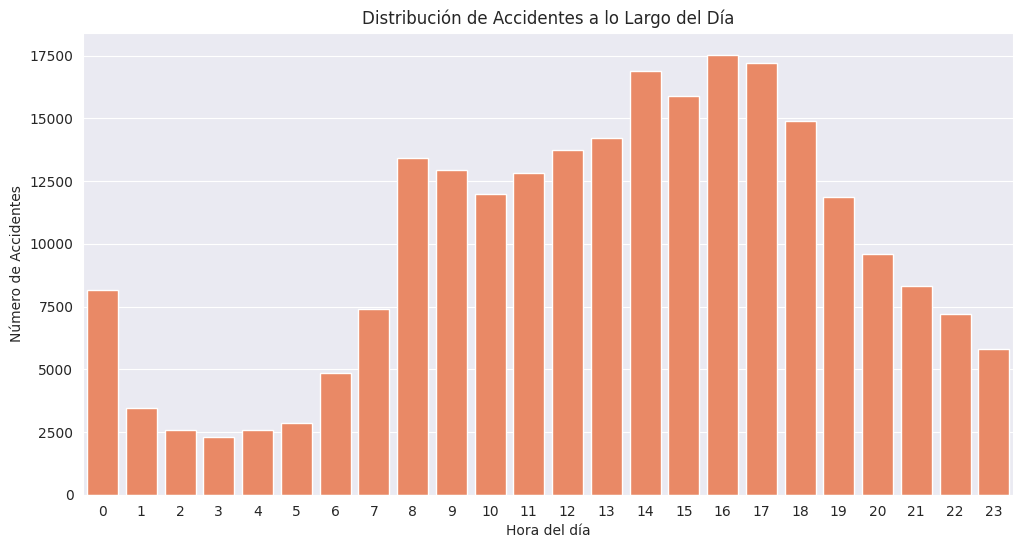

In [26]:
# Solución propuesta

# Convertir la columna 'TIME' a formato datetime en 24 horas
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M', errors='coerce')

# Extraer la hora
df['HOUR'] = df['TIME'].dt.hour

# Contar el número de accidentes por hora
accidentes_por_hora = df['HOUR'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, color='coral')

# Personalizar etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número de Accidentes')
plt.title('Distribución de Accidentes a lo Largo del Día')

# Mostrar la gráfica
plt.show()

###En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

La crítica que le hariamos es que es necesario ver el dato de la ubicacion ya que hay zonas en que el tráfico es mayor que otras, adicional seria bueno dividir el dato de los dias de la semana ya que hay dias de la semana de mayor tráfico que otros, por ejemplo los dias laborales normalmente hay mas tráfico que en los de los fines de semana.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

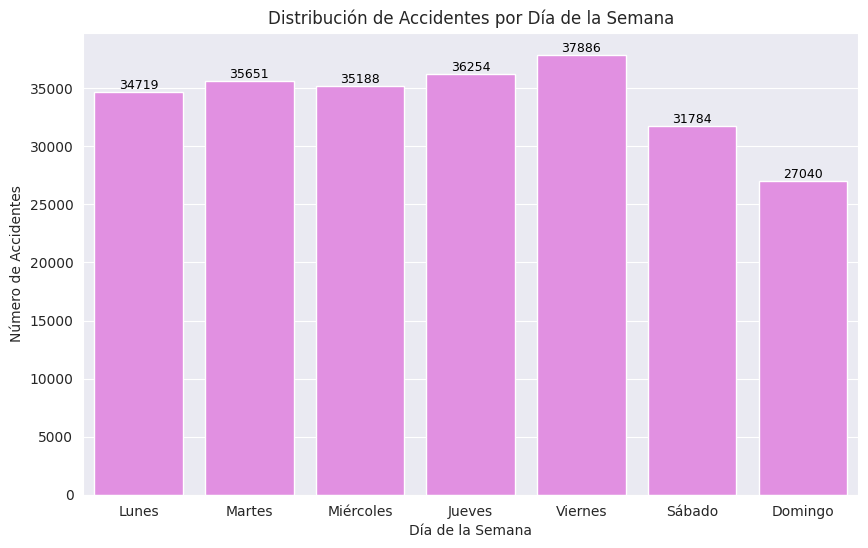

In [28]:
# Solución propuesta
#Se parte que en el ejercicio 2 ya pasamos la columna 'DATE' a formato datetime
# Extraer el día de la semana usando dt.weekday
df['dia_sem'] = df['DATE'].dt.weekday

# Diccionario para traducir números a nombres de días
dias_semana = {
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves',
    4: 'Viernes', 5: 'Sábado', 6: 'Domingo'
}

# Reemplazar valores numéricos por nombres de días
df['dia_sem'] = df['dia_sem'].map(dias_semana)

# Contar el número de accidentes por día de la semana
accidentes_por_dia = df['dia_sem'].value_counts().reindex(dias_semana.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accidentes_por_dia.index, y=accidentes_por_dia.values, color='violet')

# Agregar valores dentro de las barras
plt.gca().bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=9, color='black')

# Personalizar etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.title('Distribución de Accidentes por Día de la Semana')

# Mostrar la gráfica
plt.show()

###¿Cómo varía el número de accidentes en una sola semana?
Se observa que hay mayor numero de accidentes de Lunes a Viernes con una tendencia alcista. Los fines de semana disminuye con tendencia a la baja.

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

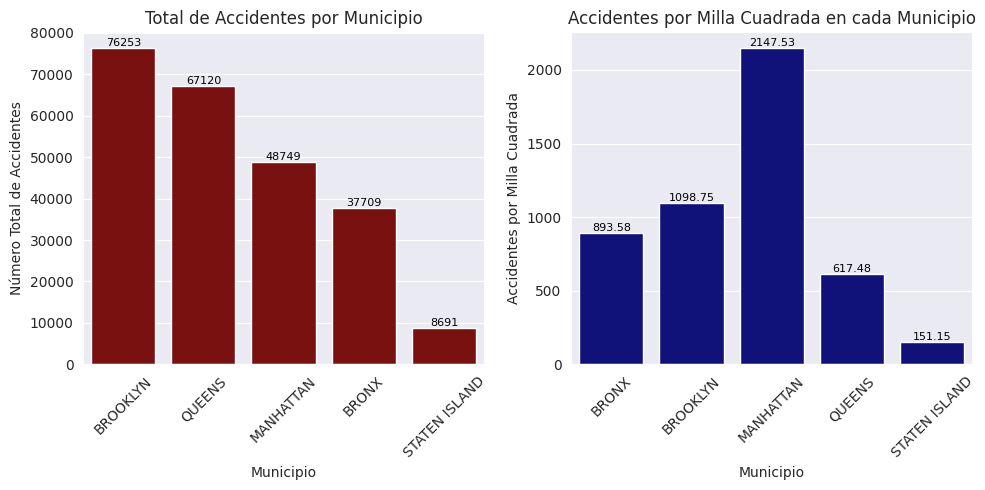

In [29]:
# Solución

# Contar el número total de accidentes por municipio (BOROUGH)
accidentes_por_municipio = df['BOROUGH'].value_counts()

# Diccionario con el área de cada municipio en millas cuadradas
areas_municipios = {
    'BRONX': 42.2,
    'BROOKLYN': 69.4,
    'MANHATTAN': 22.7,
    'QUEENS': 108.7,
    'STATEN ISLAND': 57.5
}

# Calcular accidentes por milla cuadrada
accidentes_por_milla = accidentes_por_municipio / pd.Series(areas_municipios)

# Crear subgráficos en la misma línea
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primera gráfica: Total de accidentes por municipio
bars1 = sns.barplot(x=accidentes_por_municipio.index, y=accidentes_por_municipio.values, color='darkred', ax=axes[0])
axes[0].set_xlabel('Municipio')
axes[0].set_ylabel('Número Total de Accidentes')
axes[0].set_title('Total de Accidentes por Municipio')
axes[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X

# Agregar valores dentro de las barras
axes[0].bar_label(bars1.containers[0], fmt='%d', label_type='edge', fontsize=8, color='black')

# Segunda gráfica: Accidentes por milla cuadrada
bars2 = sns.barplot(x=accidentes_por_milla.index, y=accidentes_por_milla.values, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Municipio')
axes[1].set_ylabel('Accidentes por Milla Cuadrada')
axes[1].set_title('Accidentes por Milla Cuadrada en cada Municipio')
axes[1].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X

# Agregar valores dentro de las barras
axes[1].bar_label(bars2.containers[0], fmt='%.2f', label_type='edge', fontsize=8, color='black')

# Ajustar el espacio entre gráficas
plt.tight_layout()
plt.show()

####Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

Por milla cuadrada el que tiene mas cantidad de accidentes es Manhattan ya que es el municipio mas pequeño de area pero a su vez es el de mayor densidad de población y por ende más tráfico vehicular.

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

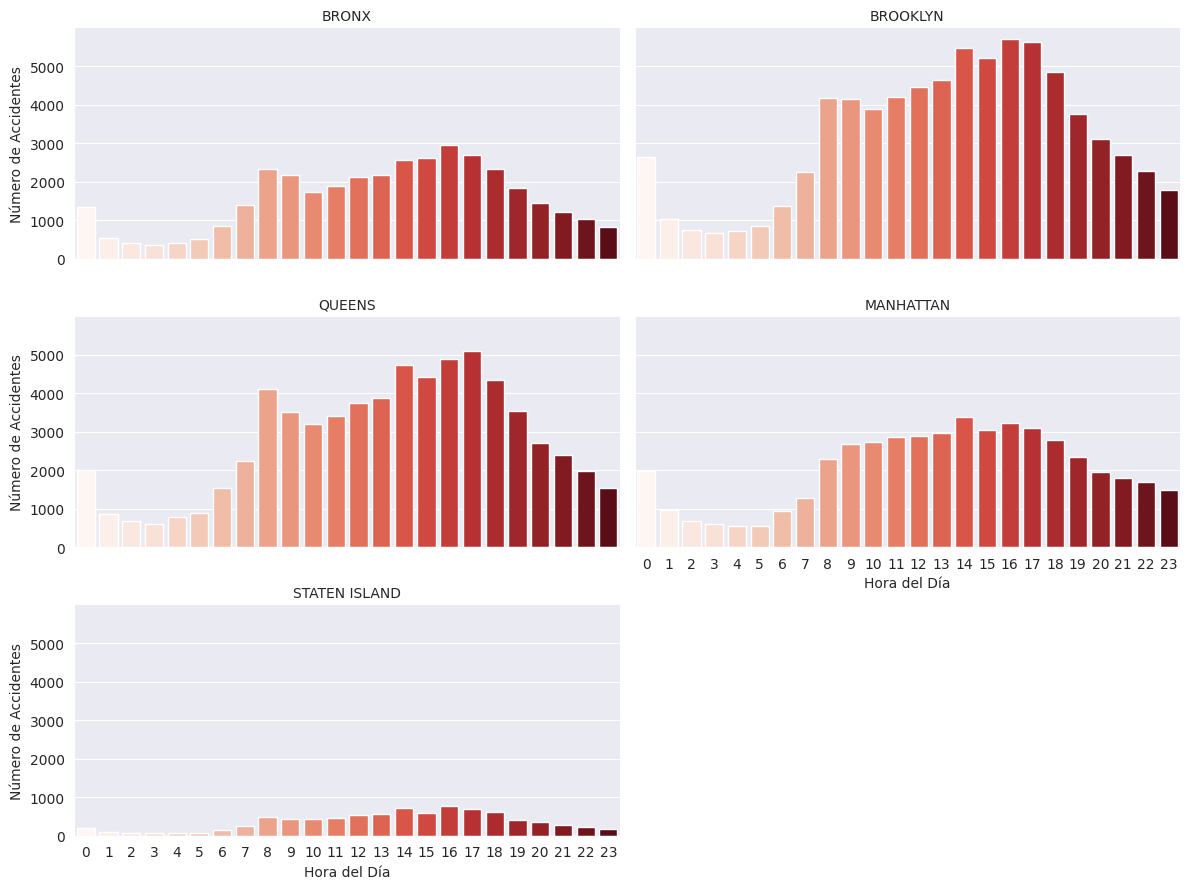

In [ ]:
# Solución propuesta

# Crear FacetGrid para graficar cada municipio por separado
g = sns.FacetGrid(df, col="BOROUGH", col_wrap=2, height=3, sharex=True, aspect=2, sharey=True)

# Aplicar la gráfica de barras a cada municipio
g.map_dataframe(sns.barplot, x="HOUR", y="HOUR", estimator=lambda x: len(x), errorbar=None, palette ="Reds", hue="HOUR", order=range(24))

# Personalizar etiquetas y títulos
g.set_axis_labels("Hora del Día", "Número de Accidentes")
g.set_titles("{col_name}")

# Mostrar gráfica
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? **

Con respecto al comportamiento de los accidentes se observa una tendencia similar en todos los distritos. Por ejemplo se observa que en las horas pico de tráfico hay la mayor cantidad de accidentes indiferente del distrito.

**¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Debido a la similitud del comportamiento de los accidentes en todos los distritos no es necesario concentranos en los momentos.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

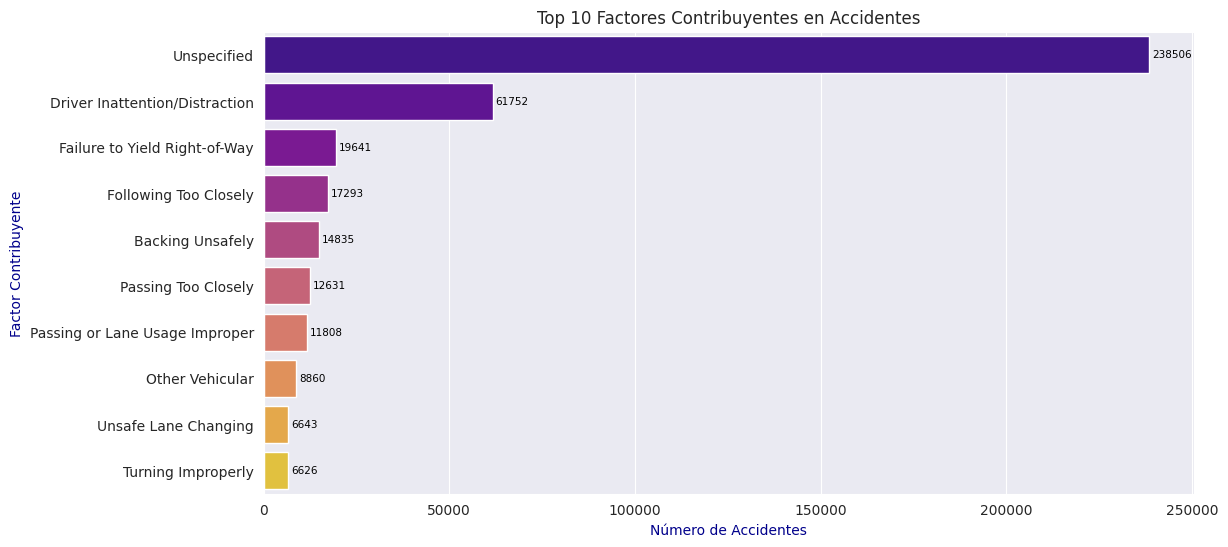

In [31]:
from os import truncate
# Solución propuesta
# Seleccionar las columnas de factores contribuyentes
contributing_factors_cols = [col for col in df.columns if "CONTRIBUTING FACTOR VEHICLE" in col]

# Concatenar las columnas en una sola serie, evitando duplicados por accidente (COLLISION_ID)
factores_contribuyentes = pd.concat([df[['COLLISION_ID', col]].rename(columns={col: "Factor"}) for col in contributing_factors_cols])

# Eliminar valores nulos y duplicados dentro del mismo accidente
factores_contribuyentes = factores_contribuyentes.dropna().drop_duplicates()

# Contar la cantidad de veces que aparece cada factor contribuyente
conteo_factores = factores_contribuyentes.groupby("Factor").size().reset_index(name="Conteo")

# Ordenar de mayor a menor
conteo_factores = conteo_factores.sort_values(by="Conteo", ascending=False)

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=conteo_factores.head(10),
    y="Factor",
    x="Conteo",
    hue="Factor",  # Asigna el color a la variable `Factor`
    palette="plasma",
    legend=False,  # Evita la leyenda innecesaria
    errorbar=None
)

# Agregar valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=2, color="black", fontsize=7.5)
# Personalizar etiquetas y título
plt.xlabel("Número de Accidentes", color="darkblue")
plt.ylabel("Factor Contribuyente", color="darkblue")
plt.title("Top 10 Factores Contribuyentes en Accidentes")

# Mostrar la gráfica
plt.show()



### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

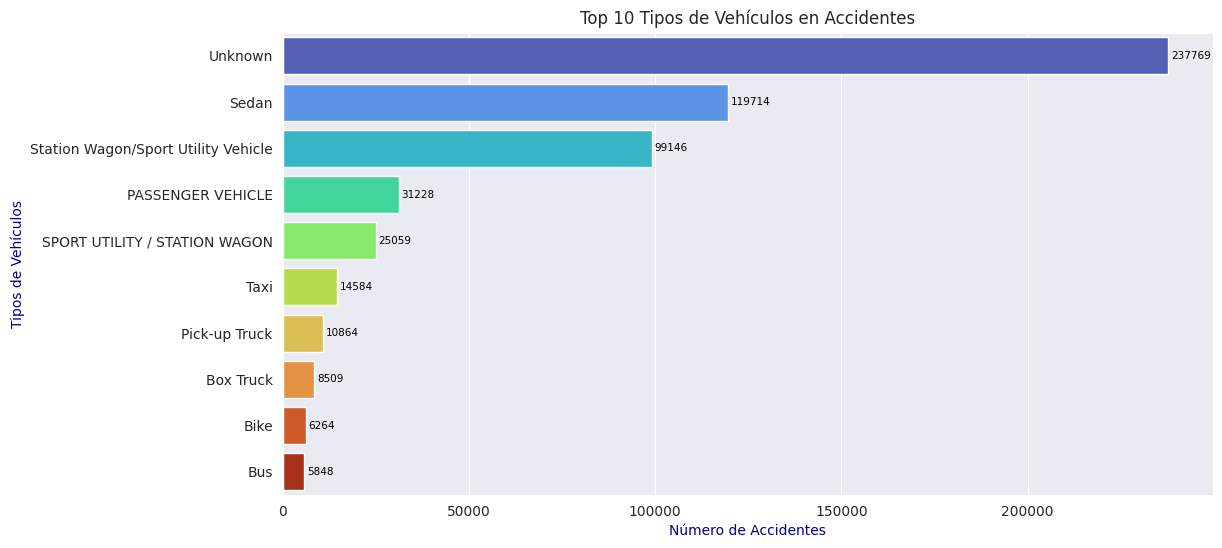

In [32]:
# Solución propuesta

# Seleccionar las columnas de Vehicle type
vehicle_type_cols = [col for col in df.columns if "VEHICLE TYPE CODE" in col]

# Concatenar las columnas en una sola serie, evitando duplicados por accidente (COLLISION_ID)
vehicle_type = pd.concat([df[['COLLISION_ID', col]].rename(columns={col: "Type"}) for col in vehicle_type_cols])

# Eliminar valores duplicados dentro del mismo accidente
vehicle_type = vehicle_type.dropna().drop_duplicates()

# Contar la cantidad de veces que aparece cada Tipo de Vehiculo
conteo_types = vehicle_type.groupby("Type").size().reset_index(name="Conteo")

# Ordenar de mayor a menor
conteo_types = conteo_types.sort_values(by="Conteo", ascending=False)

# Graficar los 10 factores más comunes
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=conteo_types.head(10),
    y="Type",
    x="Conteo",
    hue="Type",  # Asigna el color a la variable `Type`
    palette="turbo",
    legend=False,  # Evita la leyenda innecesaria
    errorbar=None
)

# Agregar valores en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=2, color="black", fontsize=7.5)

# Personalizar etiquetas
plt.xlabel("Número de Accidentes", color="darkblue")
plt.ylabel("Tipos de Vehículos", color="darkblue")
plt.title("Top 10 Tipos de Vehículos en Accidentes")

# Mostrar la gráfica
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [x] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

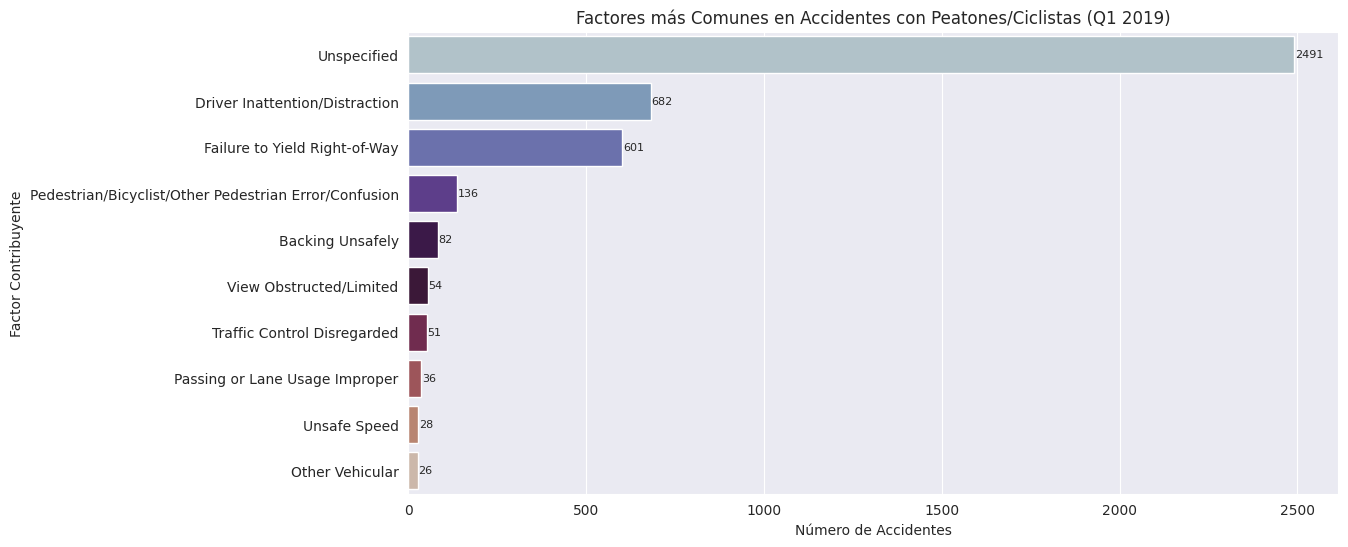

In [51]:
# Solución propuesta
"""Considere los accidentes del primer trimestre de 2019.
Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas.
Dé una recomendación basada únicamente en esta información"""

# Filtrar los datos del primer trimestre de 2018 y 2019
primer_sem_2018 = df[(df['DATE'].dt.year == 2018) & (df['DATE'].dt.month.isin([1, 2, 3]))]
primer_sem_2019 = df[(df['DATE'].dt.year == 2019) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Datos del primer semestre el 2019
# Filtrar accidentes con peatones o ciclistas heridos o muertos
df_peatones_ciclistas_2019 = primer_sem_2019[
    (primer_sem_2019['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (primer_sem_2019['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (primer_sem_2019['NUMBER OF CYCLIST INJURED'] > 0) |
    (primer_sem_2019['NUMBER OF CYCLIST KILLED'] > 0)
]

# Seleccionar las columnas de factores contribuyentes
factor_cols = [col for col in df.columns if "CONTRIBUTING FACTOR VEHICLE" in col]

# Concatenar las columnas de factores en una sola serie
factores_2019 = pd.concat(
    [df_peatones_ciclistas_2019[['COLLISION_ID', col]].rename(columns={col: "Factor"}) for col in factor_cols]
)

# Eliminar valores nulos y duplicados
factores_2019 = factores_2019.dropna().drop_duplicates()

# Contar los factores más frecuentes y convertir a DataFrame
factores_comunes_2019 = factores_2019["Factor"].value_counts().reset_index(name="Conteo").head(10) #This line changed!

# Renombrar la columna 'index' a 'Factor'
factores_comunes_2019 = factores_comunes_2019.rename(columns={"index": "Factor"}) #This line changed!


# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=factores_comunes_2019,  # Tomamos los 10 factores más comunes
    y="Factor",
    x="Conteo",
    hue="Factor",  # Asignamos hue para evitar el warning
    palette="twilight",
    legend=False  # Desactivamos la leyenda innecesaria
)

# Personalizar etiquetas
plt.xlabel("Número de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Factores más Comunes en Accidentes con Peatones/Ciclistas (Q1 2019)")

# Mostrar los valores dentro de las barras
for index, value in enumerate(factores_comunes_2019["Conteo"]): #This line changed!
    plt.text(value + 2, index, str(value), va='center', fontsize=8)

plt.show()

**Conclusión Opción 1:**
Aqui podemos ver los factores más comunes pero no se esta teniendo en cuenta la ubicacion geográfica, para hacer un análisis mas detallado es mejor incluir esta variable.

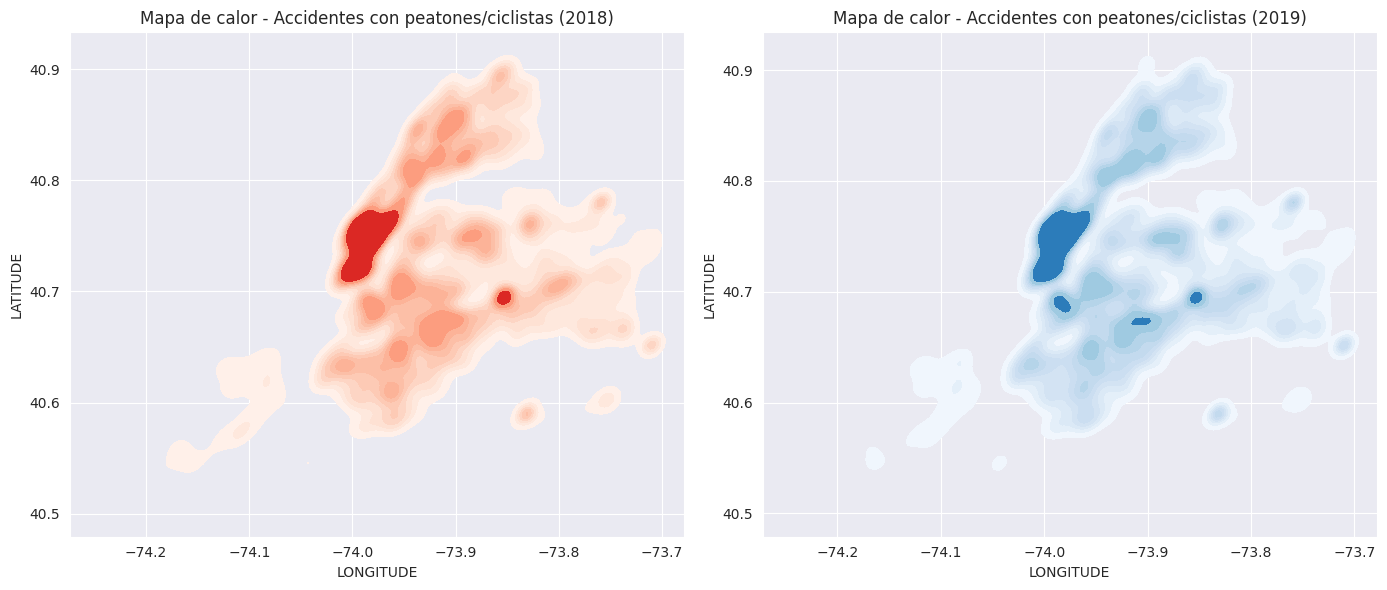

In [45]:
"""Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes.
En áreas críticas, estudie el tipo de factores involucrados en los accidentes. """

# Convertir la columna de fecha a tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Filtrar datos del primer trimestre de cada año
df_2018 = df[(df['DATE'].dt.year == 2018) & (df['DATE'].dt.month.isin([1, 2, 3]))]
df_2019 = df[(df['DATE'].dt.year == 2019) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Filtrar solo filas con coordenadas válidas
df_2018 = df_2018[['LATITUDE', 'LONGITUDE']].dropna()
df_2019 = df_2019[['LATITUDE', 'LONGITUDE']].dropna()

# Convertir a valores numéricos y eliminar valores extremos
df_2018['LATITUDE'] = pd.to_numeric(df_2018['LATITUDE'], errors='coerce')
df_2018['LONGITUDE'] = pd.to_numeric(df_2018['LONGITUDE'], errors='coerce')

df_2019['LATITUDE'] = pd.to_numeric(df_2019['LATITUDE'], errors='coerce')
df_2019['LONGITUDE'] = pd.to_numeric(df_2019['LONGITUDE'], errors='coerce')

# Filtrar datos fuera de los rangos posibles
df_2018 = df_2018[(df_2018['LATITUDE'].between(40, 45)) & (df_2018['LONGITUDE'].between(-75, -70))]
df_2019 = df_2019[(df_2019['LATITUDE'].between(40, 45)) & (df_2019['LONGITUDE'].between(-75, -70))]

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de calor 2018
sns.kdeplot(
        x=df_2018['LONGITUDE'],
        y=df_2018['LATITUDE'],
        cmap="Reds",
        fill=True,
        bw_adjust=0.5,  # Ajusta el suavizado
        ax=axes[0]
)
axes[0].set_title("Mapa de calor - Accidentes con peatones/ciclistas (2018)")

# Gráfico de calor 2019
sns.kdeplot(
        x=df_2019['LONGITUDE'],
        y=df_2019['LATITUDE'],
        cmap="Blues",
        fill=True,
        bw_adjust=0.5,  # Ajusta el suavizado
        ax=axes[1]
)
axes[1].set_title("Mapa de calor - Accidentes con peatones/ciclistas (2019)")

plt.tight_layout()
plt.show()



**Conclusión Opción 2:**
Estos mapas de calor nos permite identificar zonas donde los accidentes se han intensificado, esto nos ayuda hacer un mayor enfoque en esas zonas críticas y a su vez analizar la problemática en ellas, para poder tomar decisiones al respecto.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

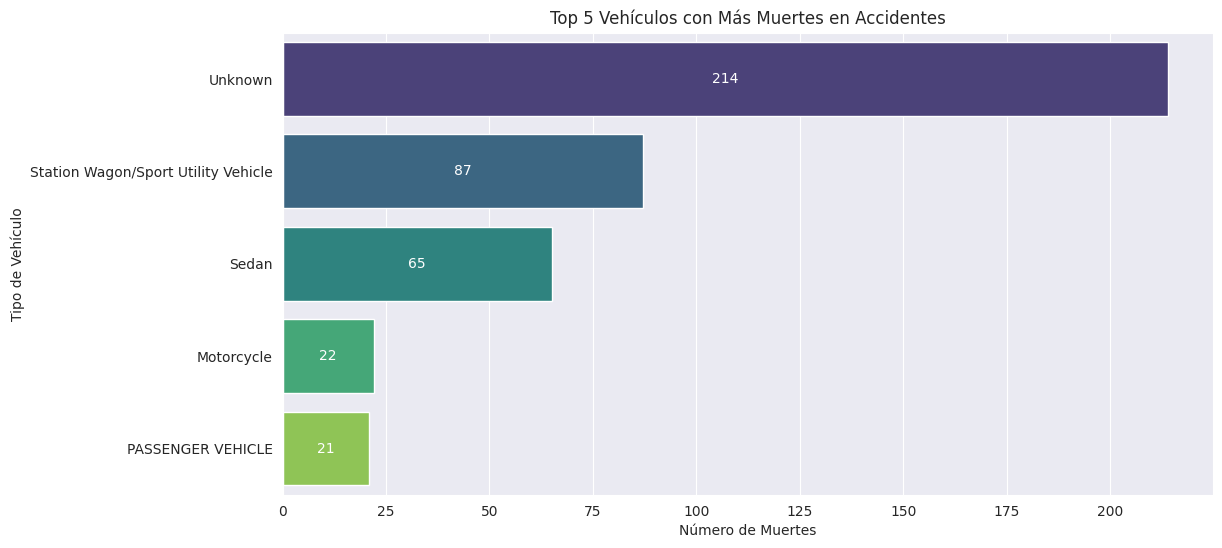

In [ ]:
# Solución propuesta

# Calcular el número total de muertes por accidente sumando todas las categorías de víctimas
df['TOTAL_KILLED'] = df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum(axis=1).to_numpy()

# Seleccionar las columnas de tipo de vehículo
vehicle_cols = [col for col in df.columns if "VEHICLE TYPE CODE" in col]

# Expandir los datos asociando cada vehículo con el número total de muertes en ese accidente
vehiculo_muertes = pd.concat([df[['COLLISION_ID', 'TOTAL_KILLED', col]].rename(columns={col: "VEHICLE_TYPE"}) for col in vehicle_cols])

# Eliminar valores nulos y duplicados dentro del mismo accidente
vehiculo_muertes = vehiculo_muertes.dropna(subset=["VEHICLE_TYPE"]).drop_duplicates()

# Agrupar por tipo de vehículo y sumar las muertes
muertes_por_vehiculo = vehiculo_muertes.groupby("VEHICLE_TYPE")["TOTAL_KILLED"].sum().reset_index()

# Ordenar y seleccionar los 5 vehículos con más muertes
top_vehiculos = muertes_por_vehiculo.sort_values(by="TOTAL_KILLED", ascending=False).head(5)

# Crear la gráfica
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_vehiculos,
    y="VEHICLE_TYPE",
    x="TOTAL_KILLED",
    hue="VEHICLE_TYPE",  # Para asignar colores automáticamente
    palette="viridis",
    legend=False,
    errorbar=None
)

# Agregar los valores dentro de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white')

# Personalizar etiquetas
plt.xlabel("Número de Muertes")
plt.ylabel("Tipo de Vehículo")
plt.title("Top 5 Vehículos con Más Muertes en Accidentes")

plt.show()


